# 0. Introduction to xgboost

xgboost, generally speaking, is a [library](https://xgboost.readthedocs.io/en/latest/) designed to provide a ['gradient boosting'](https://en.wikipedia.org/wiki/Gradient_boosting) framework for different languages, including Python and Julia.

It can run on single machines, or even distributed computing platforms such as Hadoop, Spark and Flint (all by Apache).

It has recently risen to fame because it has enabled many winners in Kaggle competitions

# What is Gradient Boosting?

When you use [ensemble learning](https://en.wikipedia.org/wiki/Ensemble_learning), what you are doing is combining many different 'weak' learners to generalise a problem, creating a 'strong' learner.

In general, the concept of boosting is to fit each 'tree' (here, a weak learner) to a [modified version of the dataset](https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab). The data points that are modified are typiclly those which were difficult to classify in the first place. This modification allows the second tree classify the difficult data points.

At first point the model is 'Tree 1 + Tree 2'. This process is repeated to a **specified number of iterations**. For each iteration, the new model tries to capture a new element that all the previous trees failed to capture.

The final model is a weighted sum of the trees.

The key parameter differentiating between different types of gradient boosters, such as AdaBoost and Gradient Boosting, is the manner in which the data is modified. 

As an example, AdaBoost changes the weights (makes them high) of the classification points to 'modify' the data. Gradient Boosters modify data based on a loss function. The latter is very advantageous because it allows the user to specify custom loss functions based on the problem at hand. For example, if you're trying to determine credit defaults (i.e. failure to repay debt), then you want to be able to predict bad loans. When you draw the FN, TN, FP, TP table, you notice that you're trying to maxmimise accuracy!

A nice way of visualising how one may go from using decision trees to xgboost can be found in the following [link](https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d)

It is probably a very good idea to start any project that has structured data with xgboost due to how quick it trains.

# Libraries

In [6]:
# system / paths

import sys
sys.path.insert(0,'../../PythonFiles')


# data

from sklearn.datasets import make_classification, make_blobs
import pandas as pd


# visualisation

import matplotlib.pyplot as plt
from plotting import plot_classes


# preprocessing


# modelling


import xgboost as xgb

# mathematical

import numpy as np


# Simple implementation

In [2]:
X, y = make_classification(
    n_samples = 100000,
    n_features = 4,
    n_redundant = 2
)

In [47]:
def plot_classes(X,y, vars = None, **kwargs):

    """
    Given X and y, where X represents the X values and y the classes, plots outcomes
    with different colors.

    I want to have the option of choosing which variables to plot against each other
    NOTE:
    -----
    - lacks the use of **kwargs *args properly
    - does not have functionality for x, y and title labels
    - does not have legend
    - only 2 dimensional

    """
    if vars:
        pass # here add code for custom variables
    else:
        ncols = int(X.shape[1] ** (1/2))
        nrows = X.shape[1] // ncols

    fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (nrows * 8, ncols * 8))
    feature_1 = 0
    feature_2 = feature_1 + 1
    for j, column in enumerate(axes):
        for i, row in enumerate(column):
            for y_unique in np.unique(y):
                axes[j,i].plot(
                    X[y == y_unique, feature_1],
                    X[y == y_unique, feature_2],
                    '.'
                )
                axes[j,i].set_xlabel('Feature {}'.format(feature_1))
                axes[j,i].set_ylabel('Feature {}'.format(feature_2))
            
            feature_2 += 1
            if feature_2 >= X.shape[1]:
                feature_1 += 1
                feature_2 = feature_1 + 1
    plt.legend([*np.unique(y)])
    return fig, axes

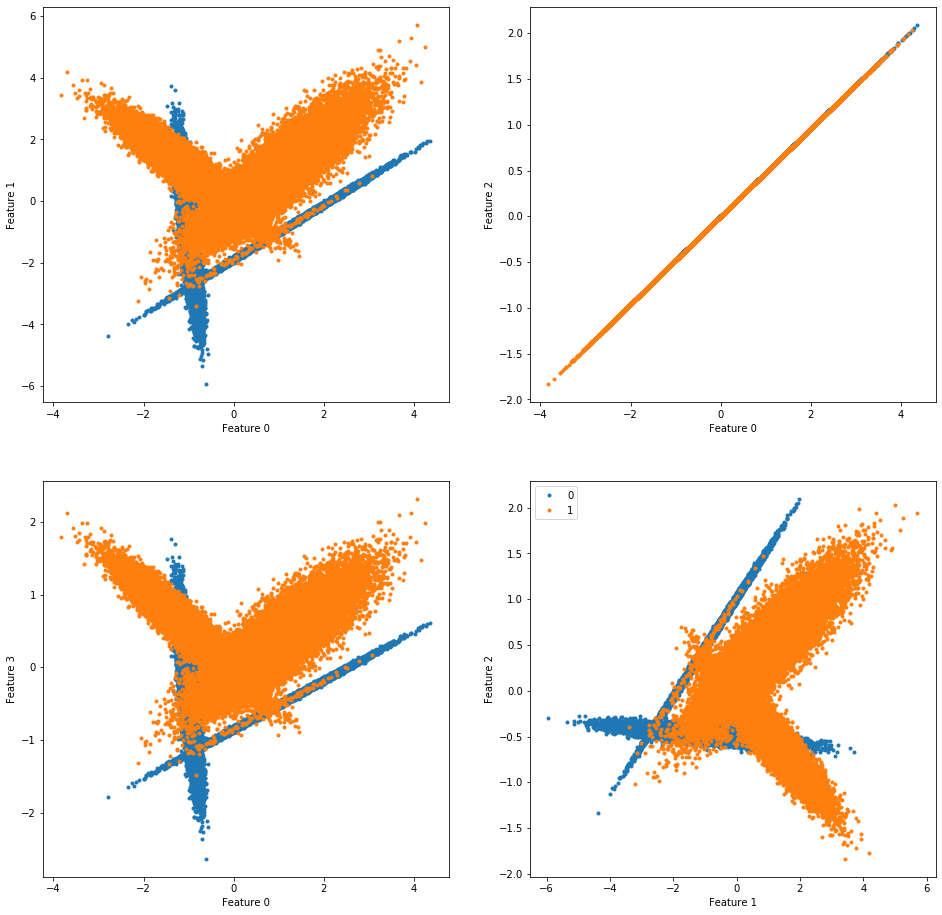

In [48]:
fig, ax = plot_classes(X,y)